<a href="https://colab.research.google.com/github/EveTLynn/Packt-Data-Analysis-Workshop/blob/main/C2_Absenteeism_at_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Nowadays, work relationships are becoming more and more trust-oriented, and
conservative contracts (in which working time is strictly monitored) are being replaced with more agile ones in which the employee themselves is responsible for accounting working time. This liberty may lead to unregulated absenteeism and may reflect poorly on an employee's candidature, even if absent hours can be accounted for with genuine reasons. This can significantly undermine healthy working relationships.
Furthermore, unregulated absenteeism can also have a negative impact on
work productivity.

In this chapter, we'll analyze absenteeism data from a Brazilian courier company, collected between July 2007 and July 2010.

# Initial Data Analysis

As a rule of thumb, when starting the analysis of a new dataset, it is good practice to check the dimensionality of the data, type of columns, possible missing values, and some generic statistics on the numerical columns. We can also get the first 5 to 10 entries in order to acquire a feeling for the data itself.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
## Print all collumns of a dataframe
pd.set_option('display.max_columns', None)

In [2]:
# import data from the GitHub page of the book
data = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop'\
'/master/Chapter02/data/Absenteeism_at_work.csv', sep=";")

In [3]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [4]:
# print dimensionality of the data, columns, types and missing values
print(f"Data dimension: {data.shape}")
for col in data.columns:
    print(f"Column: {col:35} | type: {str(data[col].dtype):7} | missing values: {data[col].isna().sum():3d}")

Data dimension: (740, 21)
Column: ID                                  | type: int64   | missing values:   0
Column: Reason for absence                  | type: int64   | missing values:   0
Column: Month of absence                    | type: int64   | missing values:   0
Column: Day of the week                     | type: int64   | missing values:   0
Column: Seasons                             | type: int64   | missing values:   0
Column: Transportation expense              | type: int64   | missing values:   0
Column: Distance from Residence to Work     | type: int64   | missing values:   0
Column: Service time                        | type: int64   | missing values:   0
Column: Age                                 | type: int64   | missing values:   0
Column: Work load Average/day               | type: float64 | missing values:   0
Column: Hit target                          | type: int64   | missing values:   0
Column: Disciplinary failure                | type: int64   | missing va

Some note on the previous cell:

- `Column: {col:35}`: This prints the name of the column, right-aligned and padded to a width of 35 characters.
- `type: {str(data[col].dtype):7}`: This prints the data type of the column, right-aligned and padded to a width of 7 characters.
- `missing values: {data[col].isna().sum():3d}`: This prints the number of missing values in the column, right-aligned and padded to a width of 3 characters.

As we can see from these 21 columns, only one (Work Load Average/day)
does not contain integer values. Since no missing values are present in the data, we can consider it quite clean.

In [5]:
# Descriptive Statistic
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


Note that some of the columns, such as Month of absence, Day of the week,
Seasons, Education, Disciplinary failure, Social drinker, and
Social smoker, are encoding categorical values. So, we can back-transform the numerical values to their original categories so that we have better plotting features.

We will perform the transformation by defining a Python dict object containing the mapping and then applying the apply() function to each feature, which applies the provided function to each of the values in the column.

In [6]:
# define encoding dictionaries
month_encoding = {1: "January", 2: "February", 3: "March", 4: "April",
                  5: "May", 6: "June", 7: "July", 8: "August", 9: "September",
                  10: "October", 11: "November", 12: "December", 0: "Unknown"}
dow_encoding = {2: "Monday", 3: "Tuesday", 4: "Wednesday", 5: "Thursday", 6: "Friday"}
season_encoding = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
education_encoding = {1: "high_school", 2: "graduate", 3: "postgraduate", 4: "master_phd"}
yes_no_encoding = {0: "No", 1: "Yes"}

# backtransform numerical variables to categorical
preprocessed_data = data.copy()
preprocessed_data['Month of absence'] = preprocessed_data['Month of absence'].apply(lambda x: month_encoding[x])
preprocessed_data['Day of the week'] = preprocessed_data['Day of the week'].apply(lambda x: dow_encoding[x])
preprocessed_data["Seasons"] = preprocessed_data["Seasons"].apply(lambda x: season_encoding[x])
preprocessed_data["Education"] = preprocessed_data["Education"].apply(lambda x: education_encoding[x])
preprocessed_data["Disciplinary failure"] = preprocessed_data["Disciplinary failure"].apply(lambda x: yes_no_encoding[x])
preprocessed_data["Social drinker"] = preprocessed_data["Social drinker"].apply(lambda x: yes_no_encoding[x])
preprocessed_data["Social smoker"] = preprocessed_data["Social smoker"].apply(lambda x: yes_no_encoding[x])

In [7]:
# transform columns
preprocessed_data.head().T

,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


## Initial Analysis of the Reason for Absence

Create a new variable, called Disease, which indicates whether a specific reason for absence is present in the ICD table or not.

Only values 1 to 21 represent ICD encoding; values 22 to 28 are separate
reasons, which do not represent a disease, while value 0 is not defined—hence the
encoded reason Unknown.

<Axes: xlabel='Disease', ylabel='count'>

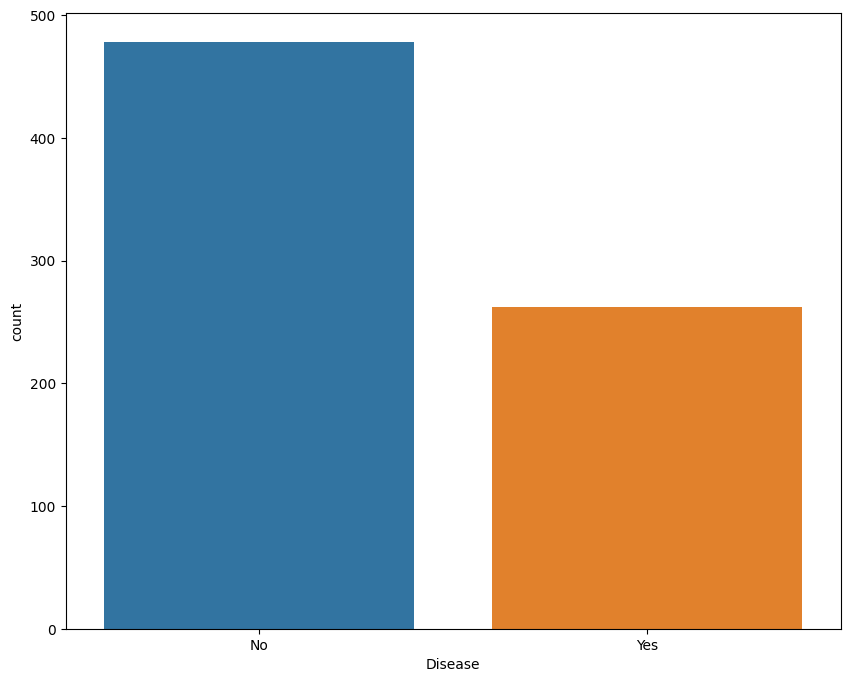

In [8]:
# define function, which checks if the provided integer value
# is contained in the ICD or not
def in_icd(val):
    return "Yes" if val >= 1 and val <= 21 else "No"

# add Disease column
preprocessed_data["Disease"] = preprocessed_data["Reason for absence"].apply(in_icd)

# plot value counts
plt.figure(figsize=(10, 8))
sns.countplot(data=preprocessed_data, x='Disease')

Let's start with a simple analysis of the Reason for absence column. We will try to address questions such as, what is the most common reason for absence? Does being a drinker or smoker have some effect on the causes? Does the distance to work have some effect on the reasons? And so on. Starting with these types of questions is often important when performing data analysis, as this is a good way to obtain confidence and understanding of the data.


The first thing we are interested in is the overall distribution of the absence reasons in the data—that is, how many entries we have for a specific reason for absence in our dataset.

Text(0, 0.5, 'Number of entries per reason of absence')

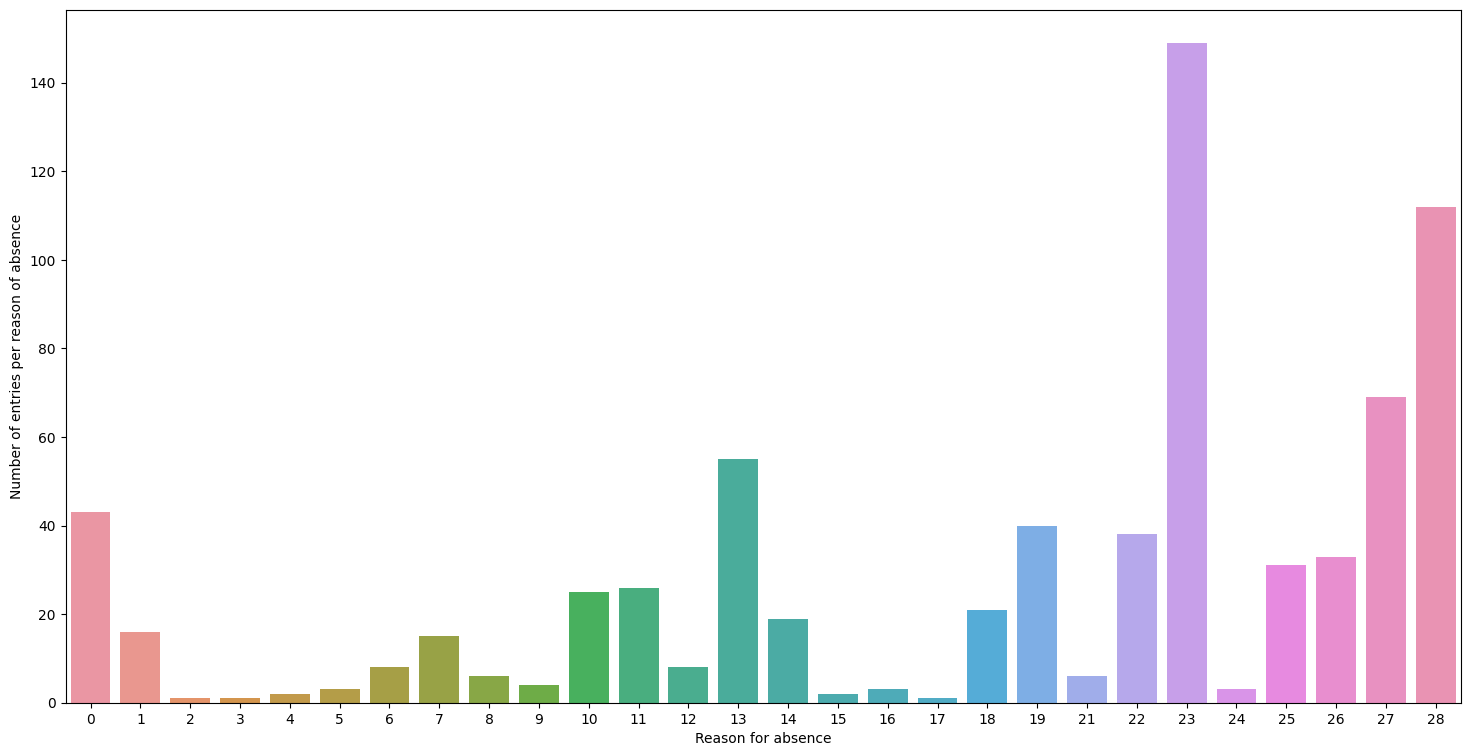

In [9]:
plt.figure(figsize=(18,9))
ax = sns.countplot(data=preprocessed_data, x='Reason for absence')
ax.set_ylabel("Number of entries per reason of absence")

we can assert that the most frequent reasons for absence are related to medical consultations (23), dental consultations (28), and physiotherapy (27). On the other hand, the most frequent reasons for absence encoded in the ICD encoding are related to diseases of the musculoskeletal system
and connective tissue (13) and injury, poisoning, and certain other consequences of external causes (19).

In order to perform a more accurate and in-depth analysis of the data, we wil
investigate the impact of the various features on the Reason for absence and
Absenteeism in hours columns in the following sections.

# Analysis of Social Drinkers and Smokers

As smoking and frequent drinking have a negative impact on health
conditions, we would expect that certain diseases are more frequent in smokers and drinkers than others. Note that in the absenteeism dataset, 56% of the registered employees are drinkers, while only 7% are smokers.

Text(0, 0.5, 'Number of entries per reason of absence')

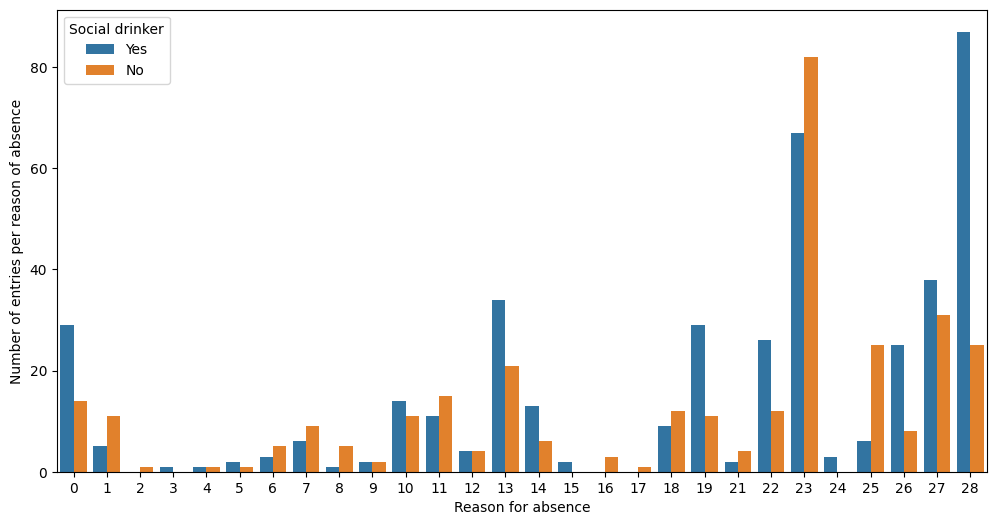

In [10]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=preprocessed_data, x='Reason for absence', hue='Social drinker', hue_order=["Yes", "No"])
ax.set_ylabel("Number of entries per reason of absence")

Text(0, 0.5, 'Number of entries per reason of absence')

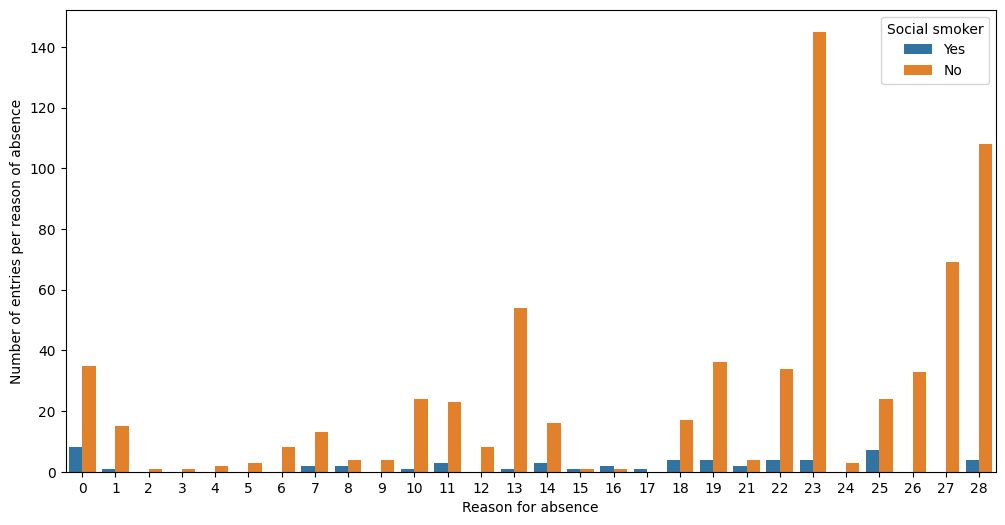

In [11]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=preprocessed_data, x='Reason for absence', hue='Social smoker', hue_order=["Yes", "No"])
ax.set_ylabel("Number of entries per reason of absence")

In [12]:
# Calculate the actual count for social drinkers and smokers
print(preprocessed_data['Social drinker'].value_counts(normalize=True))
print(preprocessed_data['Social smoker'].value_counts(normalize=True))

Yes    0.567568
No     0.432432
Name: Social drinker, dtype: float64
No     0.927027
Yes    0.072973
Name: Social smoker, dtype: float64


As we can see from the resulting plots, a significant difference between drinkers and non-drinkers can be observed in absences related to Dental consultations (28). Furthermore, as the number of social smokers is quite small (only 7% of the entries), it is very hard to say whether there is actually a relationship between the absence reasons and smoking.

A more rigorous approach in this direction would be to analyze the conditional probabilities of the different absence reasons, which are based on
being a social drinker or smoker.

## Identifying Reasons of Absence with Higher Probability Among Drinkers and Smokers

We will use the formula of conditional probability: The probability of A given B is equal to the probability of A and B both happening, divided by the probability of B happening.

$${P(A|B)=\frac{P(A\cap B)}{P(B)}}$$

In [13]:
type(preprocessed_data['Social drinker'].value_counts(normalize=True))
# this is pandas series so we can index the label "Yes" for the values

pandas.core.series.Series

In [14]:
# compute the unconditional probabilities of being a social drinker or smoker
drinker_prob = preprocessed_data['Social drinker'].value_counts(normalize=True)['Yes']
smoker_prob = preprocessed_data['Social smoker'].value_counts(normalize=True)['Yes']
print(f"P(social drinker) = {drinker_prob:.3f} | P(social smoker) = {smoker_prob:.3f}")

P(social drinker) = 0.568 | P(social smoker) = 0.073


In [15]:
# compute the percentage for each reason of absence per drinker and smoker group
total_entries = preprocessed_data.shape[0]
absence_drinker_prob = preprocessed_data[preprocessed_data['Social drinker'] == 'Yes']\
                      ['Reason for absence'].value_counts()/total_entries
absence_smoker_prob = preprocessed_data[preprocessed_data['Social smoker'] == 'Yes']\
                      ['Reason for absence'].value_counts()/total_entries

In [16]:
# compute the conditional probability
cond_prob = pd.DataFrame(index=range(0,29))
cond_prob["P(Absence | Social Drinker)"] = absence_drinker_prob / drinker_prob
cond_prob["P(Absence | Social Smoker)"] = absence_smoker_prob / smoker_prob

Text(0, 0.5, 'Conditional probability')

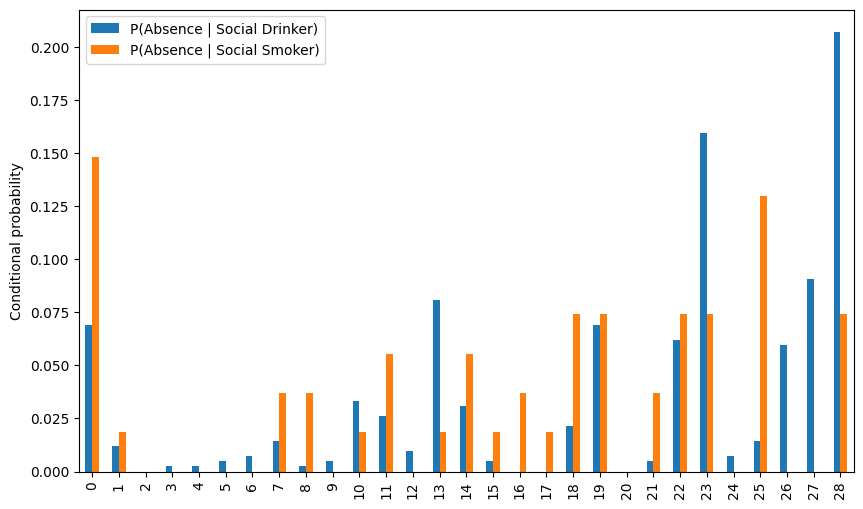

In [17]:
# plot probabilities
cond_prob.plot(kind='bar', figsize=(10,6))
plt.ylabel("Conditional probability")

As we can observe from the previous plot, the highest reason for absence for
drinkers is dental consultations (28), followed by medical consultations (23). Smokers' absences, however, are mostly due to unknown reasons (0) and
laboratory examinations (25).

## Identifying the Probability of Being a Drinker/Smoker, Conditioned to Absence Reason

We will compute the conditional probability of being a social drinker
or smoker, conditioned on the reason for absence (where Ri is thereason for which an employee is absent), as follows:
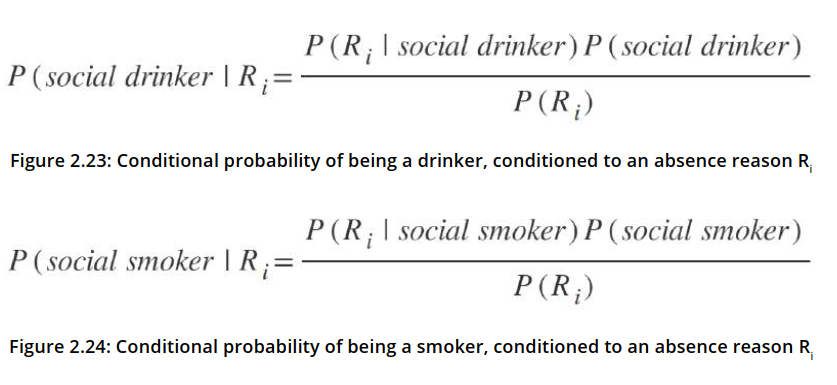


Text(0, 0.5, 'Conditional probability')

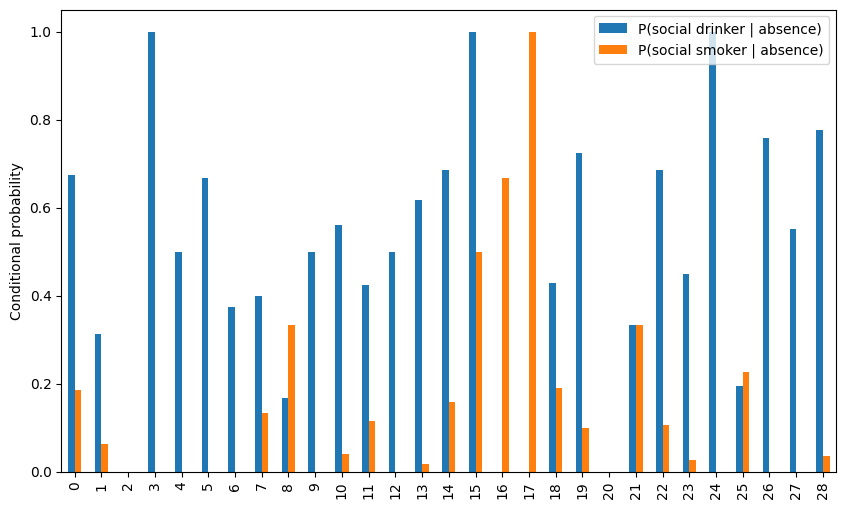

In [18]:
# compute reason for absence probabilities
absence_prob = preprocessed_data['Reason for absence'].value_counts(normalize=True)

# compute conditional probabilities for drinker/smoker
cond_prob_drinker_smoker = pd.DataFrame(index=range(0,29))

cond_prob_drinker_smoker['P(social drinker | absence)'] = cond_prob["P(Absence | Social Drinker)"] * drinker_prob / absence_prob
cond_prob_drinker_smoker['P(social smoker | absence)'] = cond_prob["P(Absence | Social Smoker)"] * smoker_prob / absence_prob

# plotting
cond_prob_drinker_smoker.plot(kind='bar', figsize=(10,6))
plt.ylabel("Conditional probability")

As you can see from the resulting plot, the conditional probabilities of being a social drinker/smoker are quite high, once an absence with a certain reason occurs. This is due to the fact that the number of entries is very small; as such, if all the registered employees who were absent for a certain reason are smokers, the probability of being a smoker, once that reason has been registered, will be equal to one (based on the available data).

<Axes: xlabel='Social smoker', ylabel='Absenteeism time in hours'>

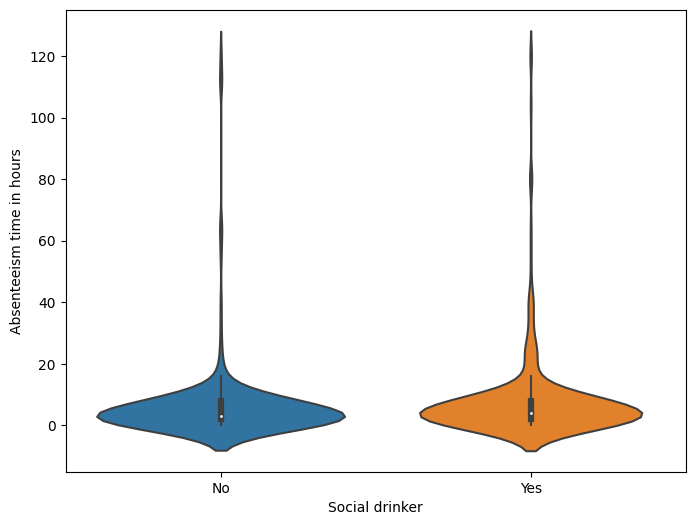

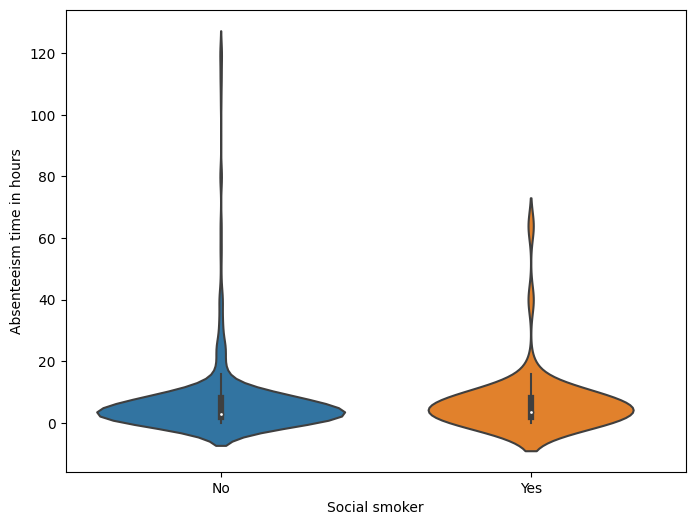

In [19]:
# create violin plots of the absenteeism time in hours
plt.figure(figsize=(8,6))
sns.violinplot(x="Social drinker", y="Absenteeism time in hours", \
                   data=preprocessed_data, order=["No", "Yes"])

plt.figure(figsize=(8,6))
sns.violinplot(x="Social smoker", y="Absenteeism time in hours", \
               data=preprocessed_data, order=["No", "Yes"])

Despite some differences in the outliers between smokers and non-smokers, there is no substantial difference in the distribution of absenteeism hours in drinkers and smokers.

To assess this statement in a rigorous statistical way, perform hypothesis testing on the absenteeism hours (with a null hypothesis stating that the average absenteeism time in hours is the same for drinkers and non-drinkers)

In [20]:
from scipy.stats import ttest_ind

hours_col = "Absenteeism time in hours"

# test mean absenteeism time for drinkers
drinkers_mask = preprocessed_data["Social drinker"] == "Yes"
hours_drinkers = preprocessed_data.loc[drinkers_mask, hours_col]
hours_non_drinkers = preprocessed_data.loc[~drinkers_mask, hours_col]
# calculate the T-test for the means of two independent samples of scores
drinkers_test = ttest_ind(hours_drinkers, hours_non_drinkers)
print(f"Statistic value: {drinkers_test[0]}, p-value: {drinkers_test[1]}")

# test mean absenteeism time for smokers
smokers_mask = preprocessed_data["Social smoker"] == "Yes"
hours_smokers = preprocessed_data.loc[smokers_mask, hours_col]
hours_non_smokers = preprocessed_data.loc[~smokers_mask, hours_col]
smokers_test = ttest_ind(hours_smokers, hours_non_smokers)
# t-statistic is a measure of the difference between the means of the two samples,
# relative to the variation within each sample
print(f"Statistic value: {smokers_test[0]}, p-value: {smokers_test[1]}")

Statistic value: 1.7713833295243993, p-value: 0.07690961828294651
Statistic value: -0.24277795417700243, p-value: 0.8082448720154971


As you can see, the p-value of both tests is above the critical value of 0.05, which means that you cannot reject the null hypothesis. In other words, you cannot say that there is a statistically significant difference in the absenteeism hours between drinkers (and smokers) and non-drinkers (and non-smokers).

In [21]:
# perform Kolmogorov-Smirnov test for comparing the distributions
from scipy.stats import ks_2samp

ks_drinkers = ks_2samp(hours_drinkers, hours_non_drinkers)
ks_smokers = ks_2samp(hours_smokers, hours_non_smokers)

print(f"Drinkers comparison: statistics={ks_drinkers[0]:.3f}, pvalue={ks_drinkers[1]:.3f}")
print(f"Smokers comparison:  statistics={ks_smokers[0]:.3f}, pvalue={ks_smokers[1]:.3f}")

Drinkers comparison: statistics=0.135, pvalue=0.002
Smokers comparison:  statistics=0.104, pvalue=0.607


The p-value for the drinkers dataset is lower than the critical 0.05, which is strong evidence against the null hypothesis of the two distributions being equal. On the other hand, as the p-value for the smokers dataset is higher than 0.05, you cannot reject the null hypothesis.

# Body Mass Index

Build the four categories (underweight, healthy weight, overweight, and obese) based on the BMI values

In [22]:
preprocessed_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Disease
0,11,26,July,Tuesday,Spring,289,36,13,33,239.554,97,No,high_school,2,Yes,No,1,90,172,30,4,No
1,36,0,July,Tuesday,Spring,118,13,18,50,239.554,97,Yes,high_school,1,Yes,No,0,98,178,31,0,No
2,3,23,July,Wednesday,Spring,179,51,18,38,239.554,97,No,high_school,0,Yes,No,0,89,170,31,2,No
3,7,7,July,Thursday,Spring,279,5,14,39,239.554,97,No,high_school,2,Yes,Yes,0,68,168,24,4,Yes
4,11,23,July,Thursday,Spring,289,36,13,33,239.554,97,No,high_school,2,Yes,No,1,90,172,30,2,No


In [23]:
"""
define function for computing the BMI category, based on BMI value
"""
def get_bmi_category(bmi):
  if bmi < 18.5:
    category ="underweight"
  elif bmi >= 18.5 and bmi < 25:
    category = "healthy weight"
  elif bmi >= 25 and bmi < 30:
    category = "overweight"
  else:
    category = "obese"
  return category


# compute BMI category
preprocessed_data["BMI category"] = preprocessed_data["Body mass index"].apply(get_bmi_category)

<Axes: xlabel='BMI category', ylabel='count'>

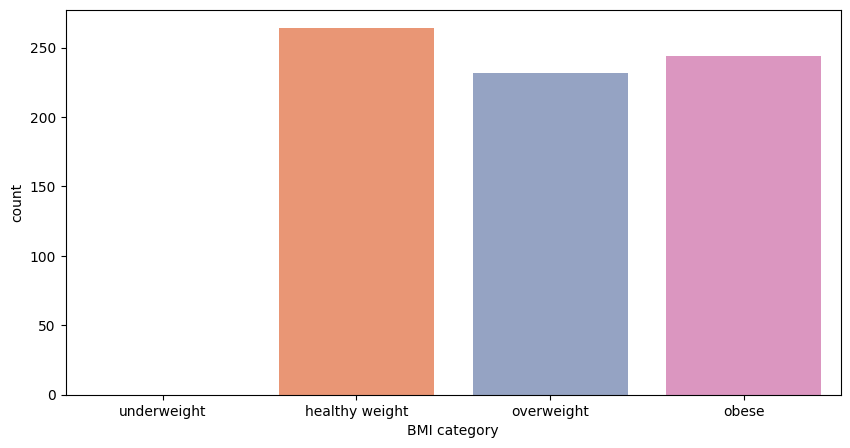

In [24]:
#### plot number of entries for each category
plt.figure(figsize=(10, 5))
sns.countplot(data=preprocessed_data, x='BMI category',
              order=["underweight", "healthy weight", "overweight", "obese"],
              palette="Set2")

There's no entries for the underweight category are present, with the
data being almost uniformly distributed among the remaining three categories. Of course, this is an alarming indicator, as more than 60% of the employees are either overweight or obese.

Text(0.5, 0, 'Number of employees')

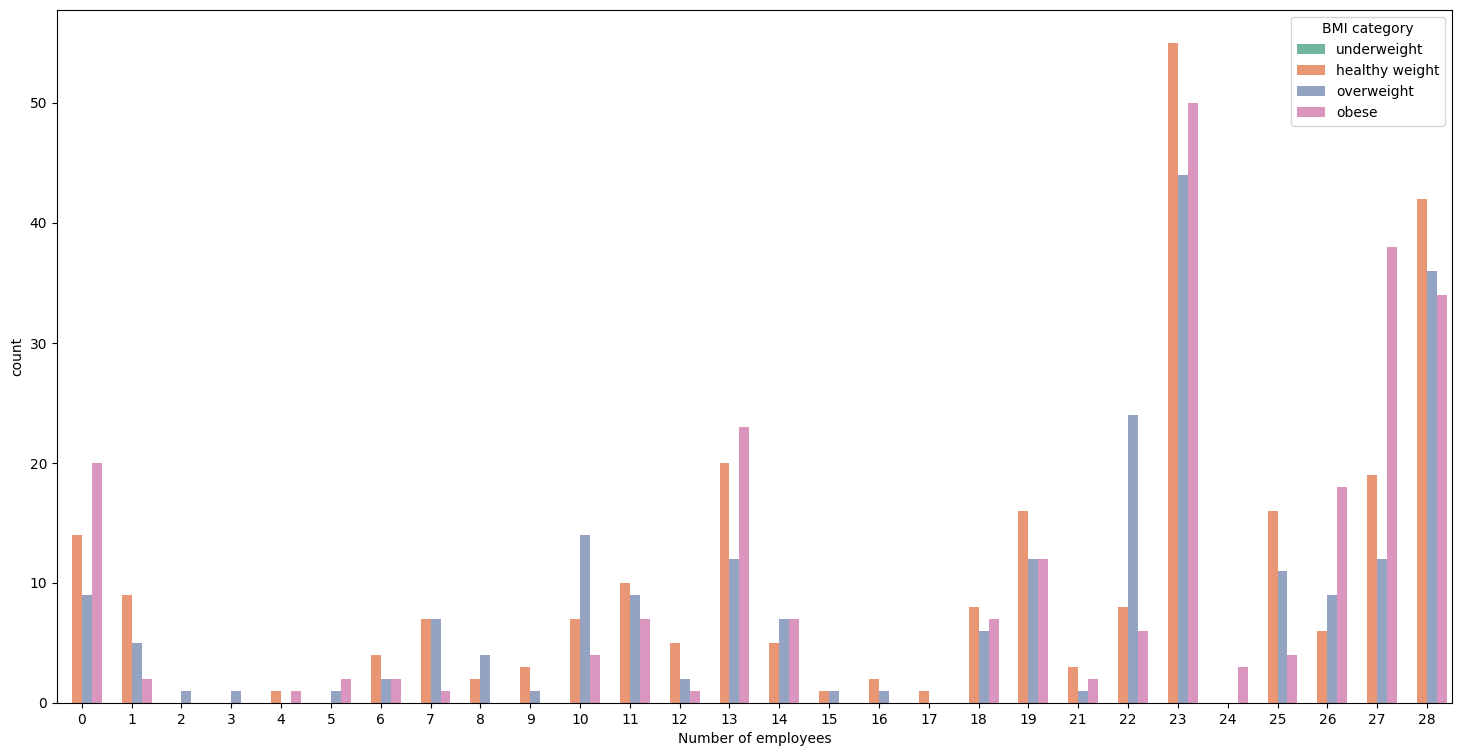

In [25]:
# plot BMI categories vs Reason for absence
plt.figure(figsize=(18, 9))
sns.countplot(data=preprocessed_data, x='Reason for absence', hue='BMI category',
              hue_order=["underweight", "healthy weight", "overweight", "obese"],
              palette='Set2')
plt.xlabel("Number of employees")

Unfortunately, no clear pattern arises from the preceding plot. In other words, for each reason for absence, an (almost) equal number of employees with different body mass indexes are present.

<Axes: xlabel='BMI category', ylabel='Absenteeism time in hours'>

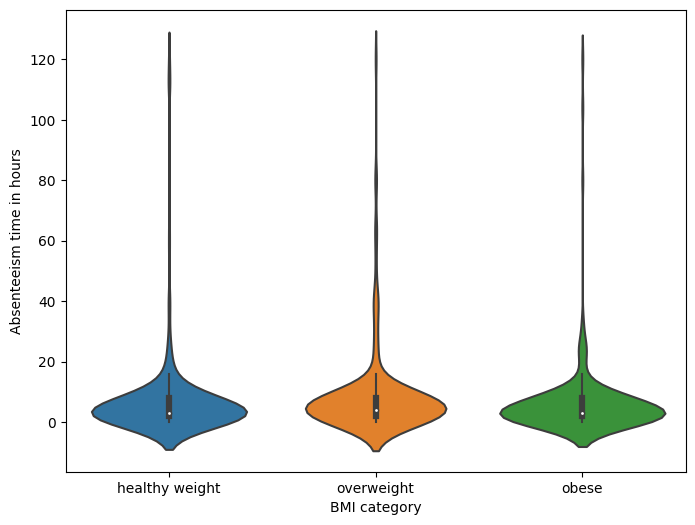

In [26]:
# plot distribution of absence time, based on BMI category
plt.figure(figsize=(8,6))
sns.violinplot(x="BMI category", y="Absenteeism time in hours",
               data=preprocessed_data, order=["healthy weight", "overweight", "obese"])

There's no evidence states that BMI and obesity levels influence the employees' absenteeism.

# Age and Education Factors

Age and education may also influence employees' absenteeism. For instance, older employees might need more frequent medical treatment, while employees with higher education degrees, covering positions of higher responsibility, might be less prone to being absent.

In [27]:
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    object 
 3   Day of the week                  740 non-null    object 
 4   Seasons                          740 non-null    object 
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    object 
 12  Education             

First, let's investigate the correlation between age and absence hours. We will create a regression plot, in which we'll plot the Age column on the x axis and Absenteeism time in hours on the y axis. We'll also include the Pearson's correlation coefficient and its p-value, where the null hypothesis is that the correlation coefficient between the two features is equal to zero

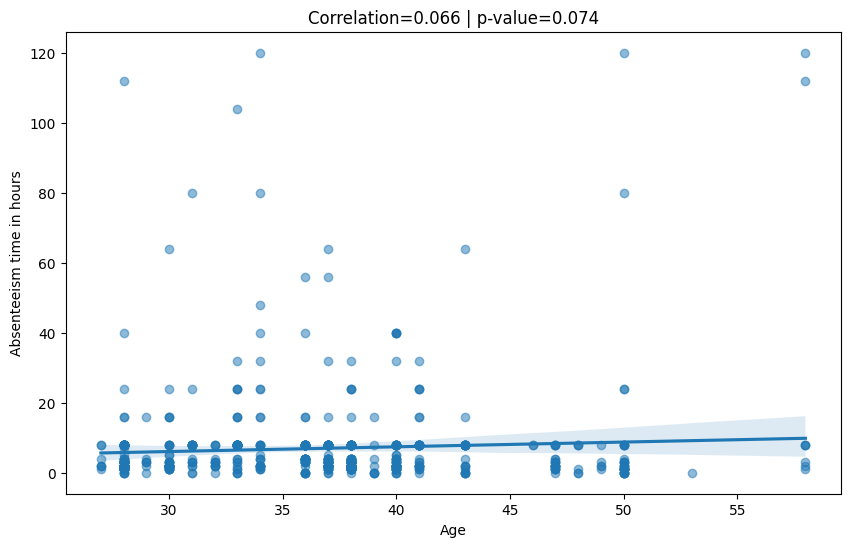

In [28]:
from scipy.stats import pearsonr

# compute Pearson's correlation coefficient and p-value
pearson_test = pearsonr(preprocessed_data["Age"],
                        preprocessed_data["Absenteeism time in hours"])

# create regression plot and add correlation coefficient in the title
plt.figure(figsize=(10, 6))
ax = sns.regplot(x="Age", y="Absenteeism time in hours",
            data=preprocessed_data, scatter_kws={"alpha":0.5})
ax.set_title(f"Correlation={pearson_test[0]:.03f} | p-value={pearson_test[1]:.03f}");

From the resulting plot, no significant pattern occurs. Furthermore,
the correlation coefficient is extremely small (0.066), and its p-value is above the threshold of 0.05, which is an additional indicator that no relationship is present between the Age and Absenteeism time in hours features.

## Investigating the Impact of Age on Reason for Absence

<Axes: xlabel='Disease', ylabel='Age'>

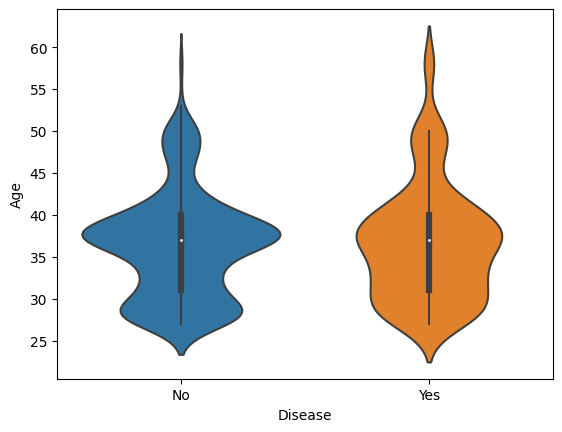

In [29]:
# plot the distribution between age and disease
sns.violinplot(data=preprocessed_data, x='Disease', y='Age')

We can see that there're slightly more samples are present for
older employees. To confirm this difference in distributions, perform hypothesis tests on the means and distributions of the two groups

In [30]:
# get Age entries for employees with Disease == Yes and Disease == No
disease_mask = preprocessed_data['Disease'] == 'Yes'
disease_ages = preprocessed_data[disease_mask]['Age']
no_disease_ages = preprocessed_data[~disease_mask]['Age']

# perform hypothesis test for equality of means
test_res = ttest_ind(disease_ages, no_disease_ages)
print(f"Test for equality of means: statistic={test_res[0]:.3f}, pvalue={test_res[1]:.3f}")

# test equality of distributions via Kolmogorov-Smirnov test
ks_res = ks_2samp(disease_ages, no_disease_ages)
print(f"KS test for equality of distributions: statistic={ks_res[0]:0.3f}, pvalue={ks_res[1]:0.3f}")

Test for equality of means: statistic=0.630, pvalue=0.529
KS test for equality of distributions: statistic=0.057, pvalue=0.619


From the results of the two tests, as p-value > 0.05, we cannot reject the null hypothesis, which means that there is no statistically significant difference between the two distributions. Thus, age is neither an indicator for the length of an absence nor for its type.

<Axes: xlabel='Reason for absence', ylabel='Age'>

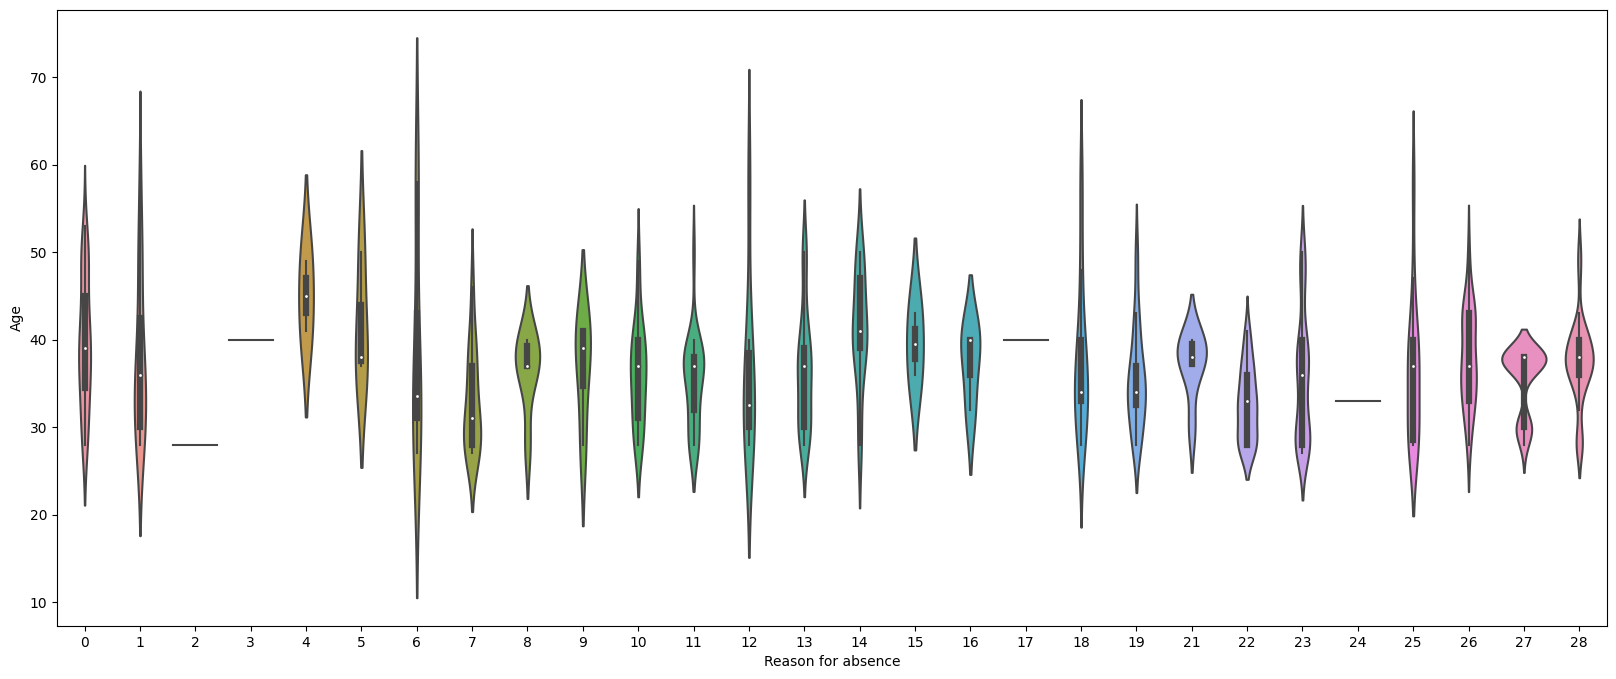

In [31]:
# violin plot of reason for absence vs age
plt.figure(figsize=(20,8))
sns.violinplot(x="Reason for absence", y="Age", data=preprocessed_data)

In light of the previously performed analysis, you can conclude that age has no impact on the employees' absenteeism

## Investigating the Impact of Education on Reason for Absence

In [32]:
# compute percentage of employees per education level
education_types = ["high_school", "graduate", "postgraduate", "master_phd"]
counts = preprocessed_data["Education"].value_counts()
percentages = preprocessed_data["Education"].value_counts(normalize=True)
for educ_type in education_types:
    print(f"Education type: {educ_type:12s} | Counts : {counts[educ_type]:6.0f} | Percentage: {100*percentages[educ_type]:4.1f}")

Education type: high_school  | Counts :    611 | Percentage: 82.6
Education type: graduate     | Counts :     46 | Percentage:  6.2
Education type: postgraduate | Counts :     79 | Percentage: 10.7
Education type: master_phd   | Counts :      4 | Percentage:  0.5


You can see that most of the employees in the data have a high school degree (82.6%), which means that the data is highly biased toward these employees

<Axes: xlabel='Education', ylabel='Absenteeism time in hours'>

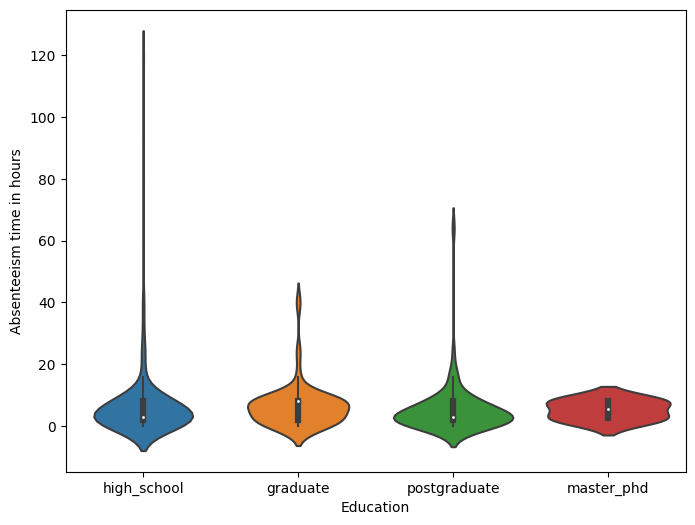

In [33]:
# distribution of absence hours based on education
plt.figure(figsize=(8,6))
sns.violinplot(data=preprocessed_data, x='Education', y='Absenteeism time in hours',
               order=["high_school", "graduate", "postgraduate", "master_phd"])

It seems most of the extreme cases of absence are among employees with lower education levels. Compute the mean and standard deviation of the absence duration for the different levels of education

In [34]:
education_types = ["high_school", "graduate", "postgraduate", "master_phd"]

for edu_type in education_types:
   mask = preprocessed_data['Education'] == edu_type
   hours = preprocessed_data[mask]['Absenteeism time in hours']
   mean = hours.mean()
   std = hours.std()
   print(f"Education type: {edu_type:12s} | Mean: {mean:.03f} | Stddev: {std:.03f}")

Education type: high_school  | Mean: 7.190 | Stddev: 14.259
Education type: graduate     | Mean: 6.391 | Stddev: 6.754
Education type: postgraduate | Mean: 5.266 | Stddev: 7.963
Education type: master_phd   | Mean: 5.250 | Stddev: 3.202


Both the mean and standard deviation of the hours of absence
are decreasing, meaning that highly educated employees tend to have shorter absences. Of course, a higher degree of education is not a cause for such a phenomenon and is more of an indication of it.

<Axes: xlabel='Reason for absence', ylabel='count'>

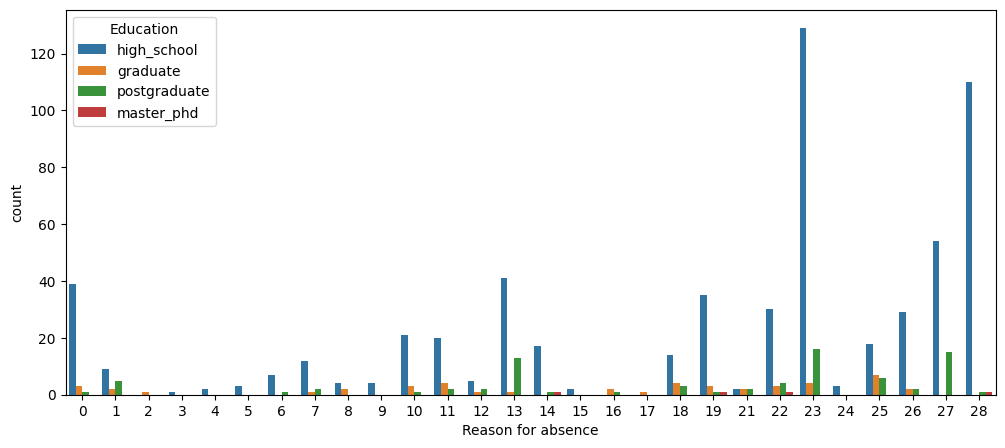

In [35]:
# plot reason for absence, based on education level
plt.figure(figsize=(12,5))
sns.countplot(data=preprocessed_data, x='Reason for absence', hue='Education',
              hue_order=["high_school", "graduate", "postgraduate", "master_phd"],)

From the preceding plot, you can observe that most of the absences relate to
employees with a high_school level of education. This is, of course, due to
the fact that most of the employees only have a high school degree (as observed in Step 1). Furthermore, from our analysis in Step 2, we saw that most of the absences that consisted of a greater number of hours were among employees with a high_school education level.

One question that comes to mind is whether the probability of being absent for more than one working week (40 hours) is greater for employees with a high school degree compared to graduates. In order to address this question, use the definition of conditional probability.

$${P(extreme\;absence|highschool)=\frac{P(absence\cap highschool)}{P(highschool)}}$$

$${P(extreme\;absence|graduate)=\frac{P(absence\cap graduate)}{P(graduate)}}$$

In [36]:
# threshold for extreme absence cases
threshold = 40

# compute the probability of extreme cases for highschool and graduate
total_entries = preprocessed_data.shape[0]
highschool_mask = preprocessed_data['Education'] == 'high_school'
extreme_mask = preprocessed_data['Absenteeism time in hours'] > 40

highschool_prob = len(preprocessed_data[highschool_mask]) / total_entries
graduate_prob = len(preprocessed_data[~highschool_mask])/total_entries

extreme_highschool_prob = len(preprocessed_data[highschool_mask & extreme_mask]) / total_entries
extreme_graduate_prob = len(preprocessed_data[~highschool_mask & extreme_mask]) / total_entries

# conditional probability
cond_prob_extreme_highschool = extreme_highschool_prob / highschool_prob
cond_prob_extreme_graduate = extreme_graduate_prob / graduate_prob
print(f"P(extreme absence | degree = high_school) = {100*cond_prob_extreme_highschool:3.2f}%")
print(f"P(extreme absence | degree != high_school) = {100*cond_prob_extreme_graduate:3.2f}%")

P(extreme absence | degree = high_school) = 2.29%
P(extreme absence | degree != high_school) = 0.78%


From the preceding computations, we can see that the probability of having an absence of more than 40 hours for employees with a high school education degree is 2.29%, which is approximately three times greater than the same probability for employees with a university degree (0.78%).

# Transportation Costs and Distance to Work Factors

Two possible indicators for absenteeism may also be the distance between home and work (the Distance from Residence to Work column) and transportation costs (the Transportation expense column). Employees who have to travel longer, or whose costs for commuting to work are high, might be more prone to absenteeism.

<Figure size 1000x600 with 0 Axes>

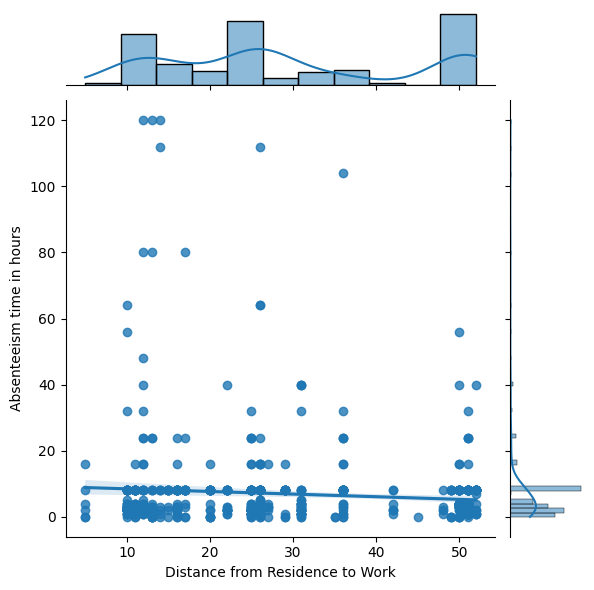

In [37]:
# plot transportation costs and distance to work agains hours
# seaborn jointplot() function, not only produces the regression plot
# between the two variables but also estimates their distribution
plt.figure(figsize=(10, 6))
sns.jointplot(x="Distance from Residence to Work", y="Absenteeism time in hours",
              data=preprocessed_data, kind="reg")

<Figure size 1200x1000 with 0 Axes>

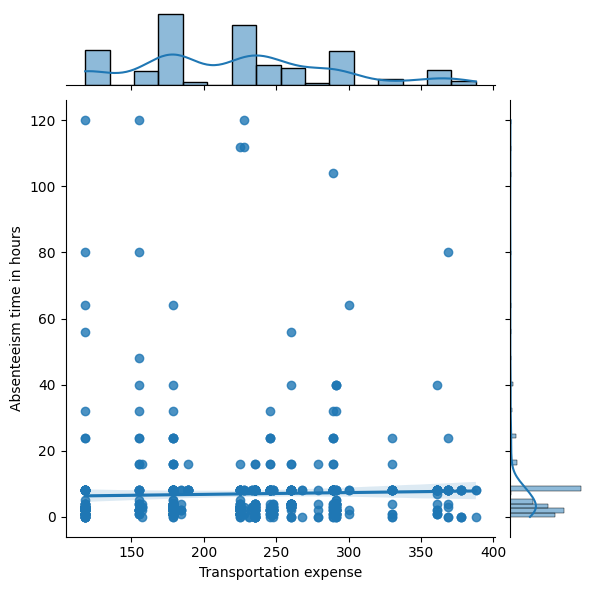

In [38]:
plt.figure(figsize=(12, 10))
sns.jointplot(x="Transportation expense", y="Absenteeism time in hours",
              data=preprocessed_data, kind="reg")

As we can see, the distributions of Distance from Residence to Work
and Transportation expense look close to normal distributions, while the
absenteeism time in hours is heavily right-skewed. This makes the comparison
between the variables difficult to interpret. One solution to this problem is to transform the data into something close to a normal distribution. A handy way to perform this transformation is to use the Box-Cox or Yeo-Johnson transformations.

<Figure size 1000x600 with 0 Axes>

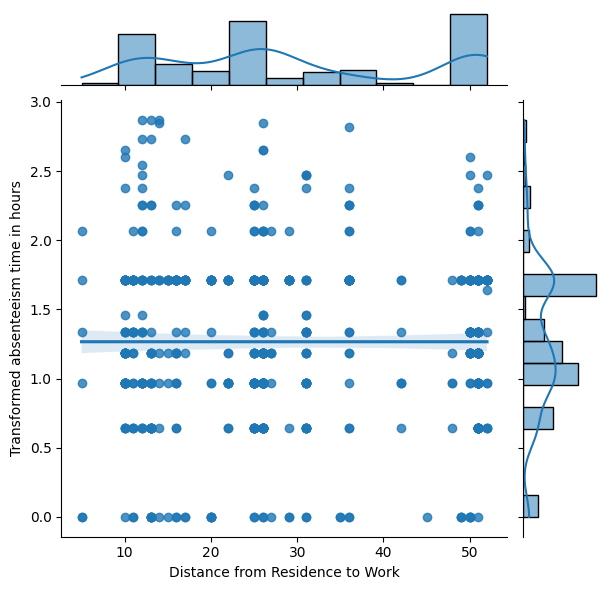

In [39]:
# run Yeo-Johnson transformation and recreate previous plots
from scipy.stats import yeojohnson

hours = yeojohnson(preprocessed_data["Absenteeism time in hours"].apply(float))
distances = preprocessed_data["Distance from Residence to Work"]
expenses = preprocessed_data["Transportation expense"]

plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=distances, y=hours[0], kind="reg")
ax.set_axis_labels("Distance from Residence to Work",\
                       "Transformed absenteeism time in hours")

<Figure size 1000x600 with 0 Axes>

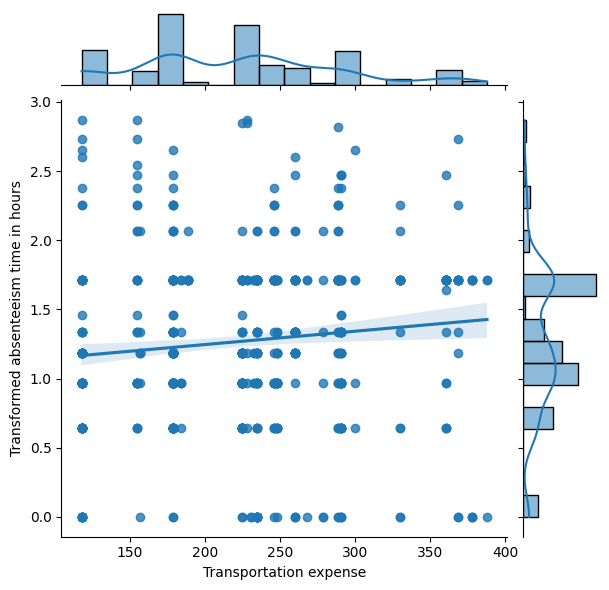

In [40]:
plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=expenses, y=hours[0], kind="reg")
ax.set_axis_labels("Transportation expense", \
                   "Transformed absenteeism time in hours")

We can also see that the regression line between the variables
is almost flat for the Distance from Residence to Work column (which
is a clear indicator of zero correlation) but has a slight upward slope for the Transportation Expense column. Therefore, we can expect a small
positive correlation

In [41]:
# investigate correlation between the columns
distance_corr = pearsonr(hours[0], distances)
expenses_corr = pearsonr(hours[0], expenses)

print(f"Distances correlation: corr={distance_corr[0]:.3f}, pvalue={distance_corr[1]:.3f}")
print(f"Expenses comparison:  corr={expenses_corr[0]:.3f}, pvalue={expenses_corr[1]:.3f}")

Distances correlation: corr=-0.000, pvalue=0.999
Expenses comparison:  corr=0.113, pvalue=0.002


These results confirm our observation, stating that there is a slight positive correlation between Transportation expense and Absenteeism time in hours.

We can also produce kernel density estimation plots (that is, plots that help us visualize the probability density functions of continuous variables) by just changing the type of the jointplot() function to kde.

<Figure size 1000x600 with 0 Axes>

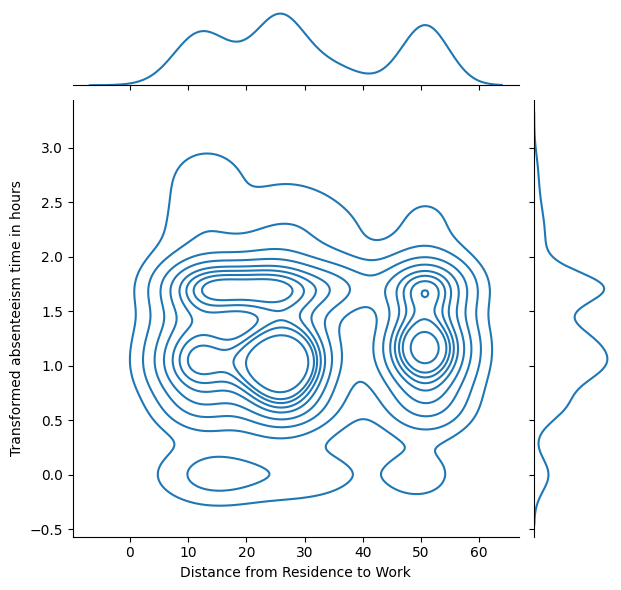

In [42]:
# produce KDE plots

plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=distances, y=hours[0], kind="kde")
ax.set_axis_labels("Distance from Residence to Work",\
                       "Transformed absenteeism time in hours")

<Figure size 1000x600 with 0 Axes>

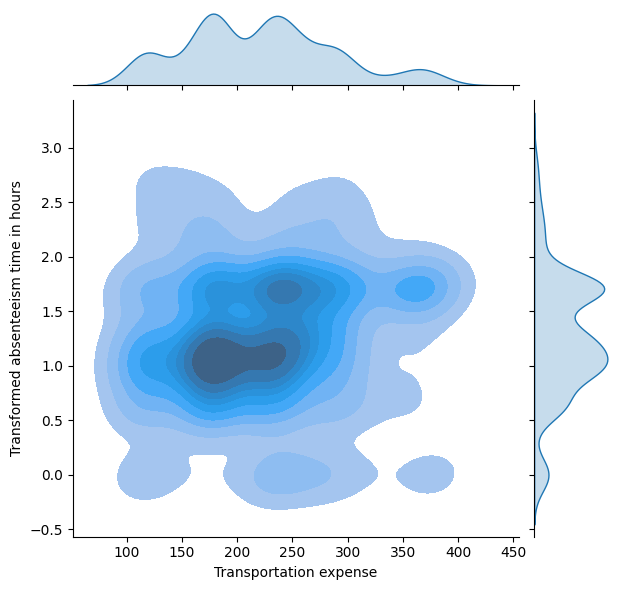

In [43]:
plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=expenses, y=hours[0], kind="kde", fill=True)
ax.set_axis_labels("Transportation expense", \
                   "Transformed absenteeism time in hours")

# Temporal Factors

Factors such as day of the week and month may also be indicators for absenteeism. For instance, employees might prefer to have their medical examinations on Friday when the workload is lower, and it is closer to the weekend. In this section, we will analyze the impact of the Day of the week and Month of absence columns, and their impact on the employees' absenteeism.

Text(0.5, 1.0, 'Number of absences per month')

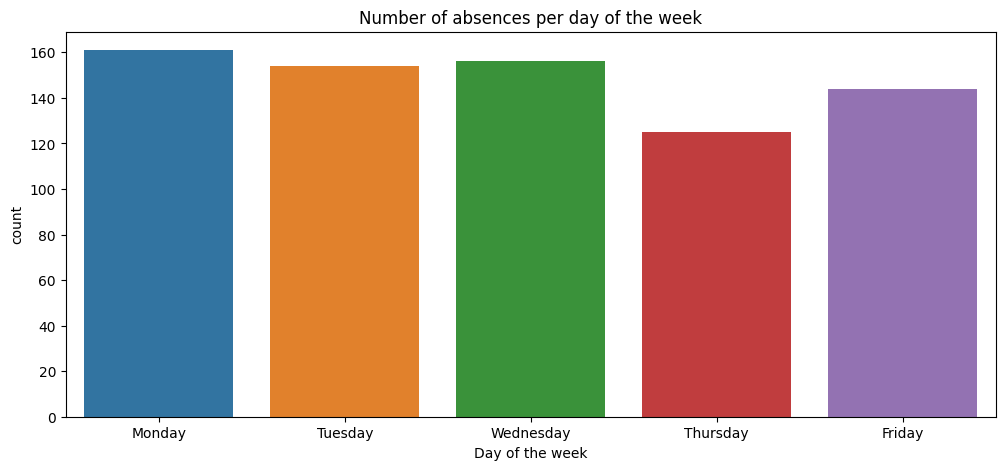

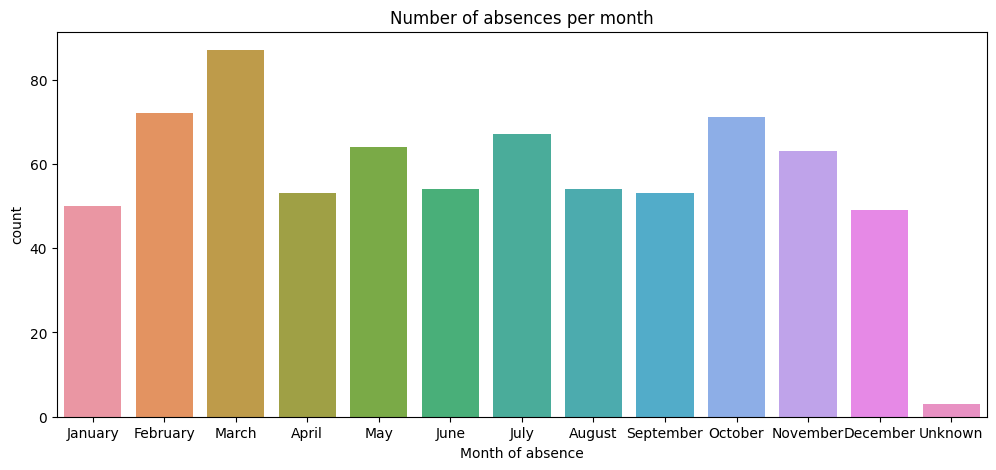

In [44]:
# number of absence per week
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=preprocessed_data, x='Day of the week',
              order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
ax.set_title("Number of absences per day of the week")

# number of absence per month
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=preprocessed_data, x='Month of absence',
              order=["January", "February", "March", "April", "May", "June", "July",
                     "August", "September", "October", "November", "December", "Unknown"])
ax.set_title("Number of absences per month")

From the preceding plots, we can't really see a substantial difference between the different days of the week or months. It seems that fewer absences occur on Thursday, while the month with the most absences is March, but it is hard to say that the difference is significant.

## Investigating Absence Hours, Based on the Day of the Week and the Month of the Year

<Axes: xlabel='Month of absence', ylabel='Absenteeism time in hours'>

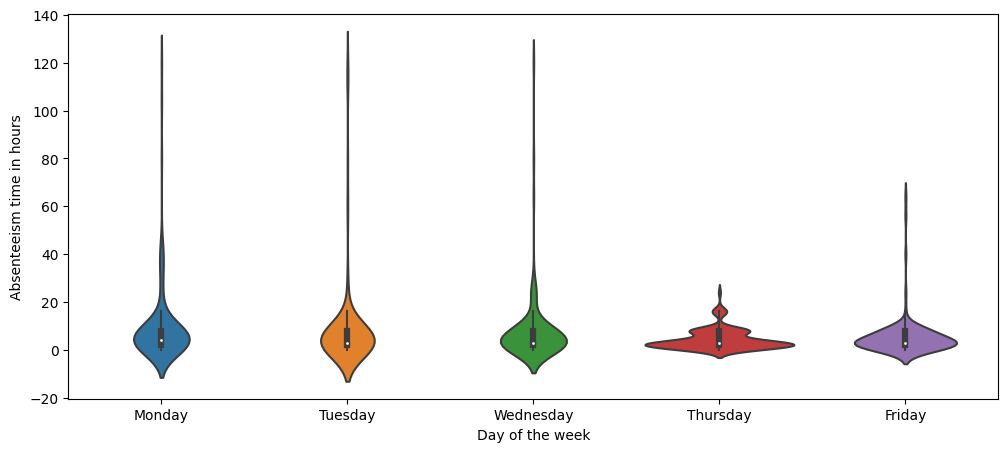

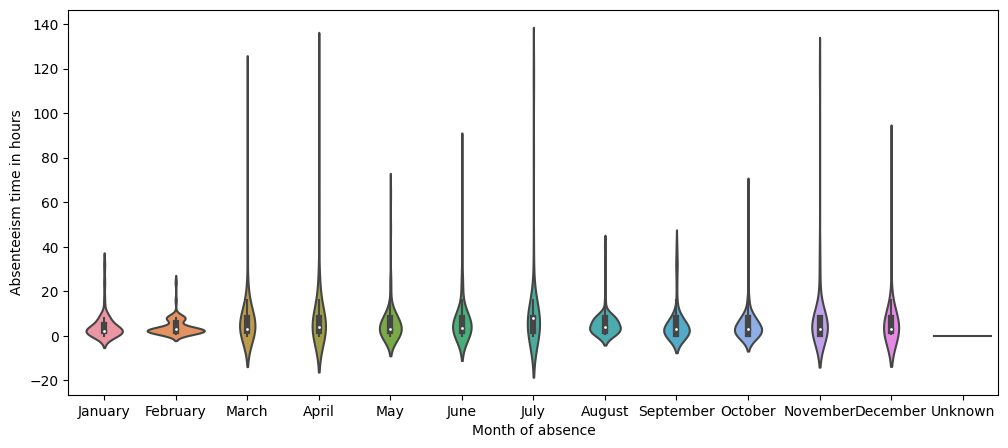

In [45]:
# analyze average distribution of absence hours
plt.figure(figsize=(12,5))
sns.violinplot(x="Day of the week", y="Absenteeism time in hours",
               data=preprocessed_data,
               order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])

plt.figure(figsize=(12,5))
sns.violinplot(x="Month of absence", y="Absenteeism time in hours",
               data=preprocessed_data,
               order=["January", "February", "March", "April", "May", "June", "July",
                     "August", "September", "October", "November", "December", "Unknown"])

In [46]:
"""
compute mean and standard deviation of absence hours per day of the week
"""
dows = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
for day in dows:
  hours = preprocessed_data[preprocessed_data['Day of the week'] == day]['Absenteeism time in hours']
  mean = hours.mean()
  std = hours.std()
  print(f"Day of the week: {day:10s} | Mean: {mean:.03f} | Stddev: {std:.03f}")

Day of the week: Monday     | Mean: 9.248 | Stddev: 15.973
Day of the week: Tuesday    | Mean: 7.981 | Stddev: 18.027
Day of the week: Wednesday  | Mean: 7.147 | Stddev: 13.268
Day of the week: Thursday   | Mean: 4.424 | Stddev: 4.266
Day of the week: Friday     | Mean: 5.125 | Stddev: 7.911


In [47]:
# compute mean and standard deviation of absence hours per day of the month
months = ["January", "February", "March", "April", "May", "June", "July",
    "August", "September", "October", "November", "December"]
for month in months:
    mask = preprocessed_data["Month of absence"] == month
    hours = preprocessed_data["Absenteeism time in hours"][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f"Month: {month:10s} | Mean : {mean:8.03f} | Stddev: {stddev:8.03f}")

Month: January    | Mean :    4.440 | Stddev:    5.786
Month: February   | Mean :    4.083 | Stddev:    3.710
Month: March      | Mean :    8.793 | Stddev:   16.893
Month: April      | Mean :    9.094 | Stddev:   18.024
Month: May        | Mean :    6.250 | Stddev:   10.314
Month: June       | Mean :    7.611 | Stddev:   12.359
Month: July       | Mean :   10.955 | Stddev:   21.547
Month: August     | Mean :    5.333 | Stddev:    5.749
Month: September  | Mean :    5.509 | Stddev:    8.407
Month: October    | Mean :    4.915 | Stddev:    8.055
Month: November   | Mean :    7.508 | Stddev:   16.121
Month: December   | Mean :    8.449 | Stddev:   16.049


Observe that the average duration of the absences is slightly shorter on Thursday (4.424 hours), while absences during July have the longest average duration (10.955 hours). To determine whether these values are statistically significant—that is, whether there is a statistically significant difference regarding the rest of the days/months

In [48]:
from scipy.stats import ttest_ind

# perform statistical test for avg duration difference
thursday_mask = preprocessed_data['Day of the week'] == 'Thursday'
july_mask = preprocessed_data["Month of absence"] == 'July'

thursday_data = preprocessed_data[thursday_mask]["Absenteeism time in hours"]
no_thursday_data = preprocessed_data[~thursday_mask]["Absenteeism time in hours"]
july_data = preprocessed_data["Absenteeism time in hours"][july_mask]
no_july_data = preprocessed_data["Absenteeism time in hours"][~july_mask]

thursday_res = ttest_ind(thursday_data, no_thursday_data)
july_res = ttest_ind(july_data, no_july_data)

print(f"Thursday test result: statistic={thursday_res[0]:.3f}, pvalue={thursday_res[1]:.3f}")
print(f"July test result: statistic={july_res[0]:.3f}, pvalue={july_res[1]:.3f}")

Thursday test result: statistic=-2.307, pvalue=0.021
July test result: statistic=2.605, pvalue=0.009


Since the p-values from both the statistical tests are below the critical value of 0.05, we can conclude the following:
- There is a statistically significant difference between Thursdays and other days of the week. Absences on Thursday have a shorter duration, on average.
- Absences during July are the longest over the year. Also, in this case, we can reject the null hypothesis of having no difference.

From the analysis we've performed in this exercise, we can conclude that our initial observations about the difference in absenteeism during the month of July and on Thursdays are correct. Of course, we cannot claim that this is the cause, but only state that certain trends exist in the data.

## Analyzing the Service Time and Son Columns

In [49]:
preprocessed_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Disease,BMI category
0,11,26,July,Tuesday,Spring,289,36,13,33,239.554,97,No,high_school,2,Yes,No,1,90,172,30,4,No,obese
1,36,0,July,Tuesday,Spring,118,13,18,50,239.554,97,Yes,high_school,1,Yes,No,0,98,178,31,0,No,obese
2,3,23,July,Wednesday,Spring,179,51,18,38,239.554,97,No,high_school,0,Yes,No,0,89,170,31,2,No,obese
3,7,7,July,Thursday,Spring,279,5,14,39,239.554,97,No,high_school,2,Yes,Yes,0,68,168,24,4,Yes,healthy weight
4,11,23,July,Thursday,Spring,289,36,13,33,239.554,97,No,high_school,2,Yes,No,1,90,172,30,2,No,obese


<Axes: xlabel='Service time', ylabel='Density'>

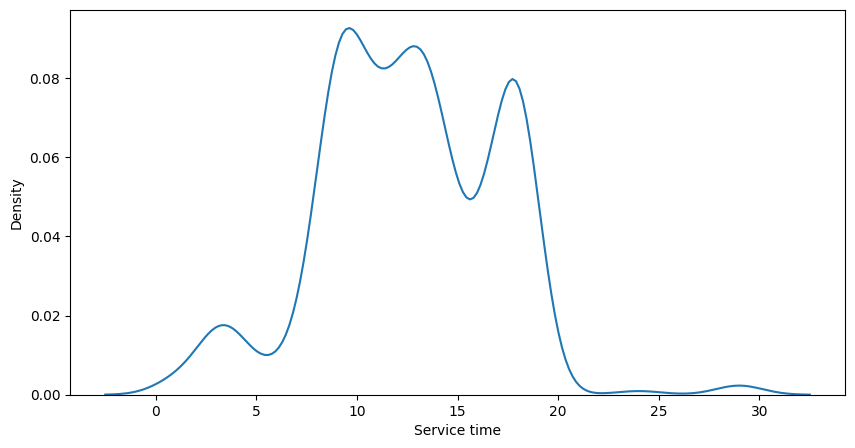

In [50]:
# distribution of the Service time
plt.figure(figsize=(10,5))
sns.kdeplot(preprocessed_data['Service time'])

Perform a hypothesis test for normality (that is, a Kolmogorov-Smirnov test with the scipy.stats.kstest() function).

In [52]:
from scipy.stats import kstest
# test if the distribution is normal
ks_res = kstest(data["Service time"], "norm")
print(f"Kolmogorov-Smirnov test for normality pvalue: {ks_res[1]:.03f}")

Kolmogorov-Smirnov test for normality pvalue: 0.000


From the resulting value of the test, we can reject the null hypothesis that the Service time column has a normal distribution

<Axes: xlabel='Reason for absence', ylabel='Service time'>

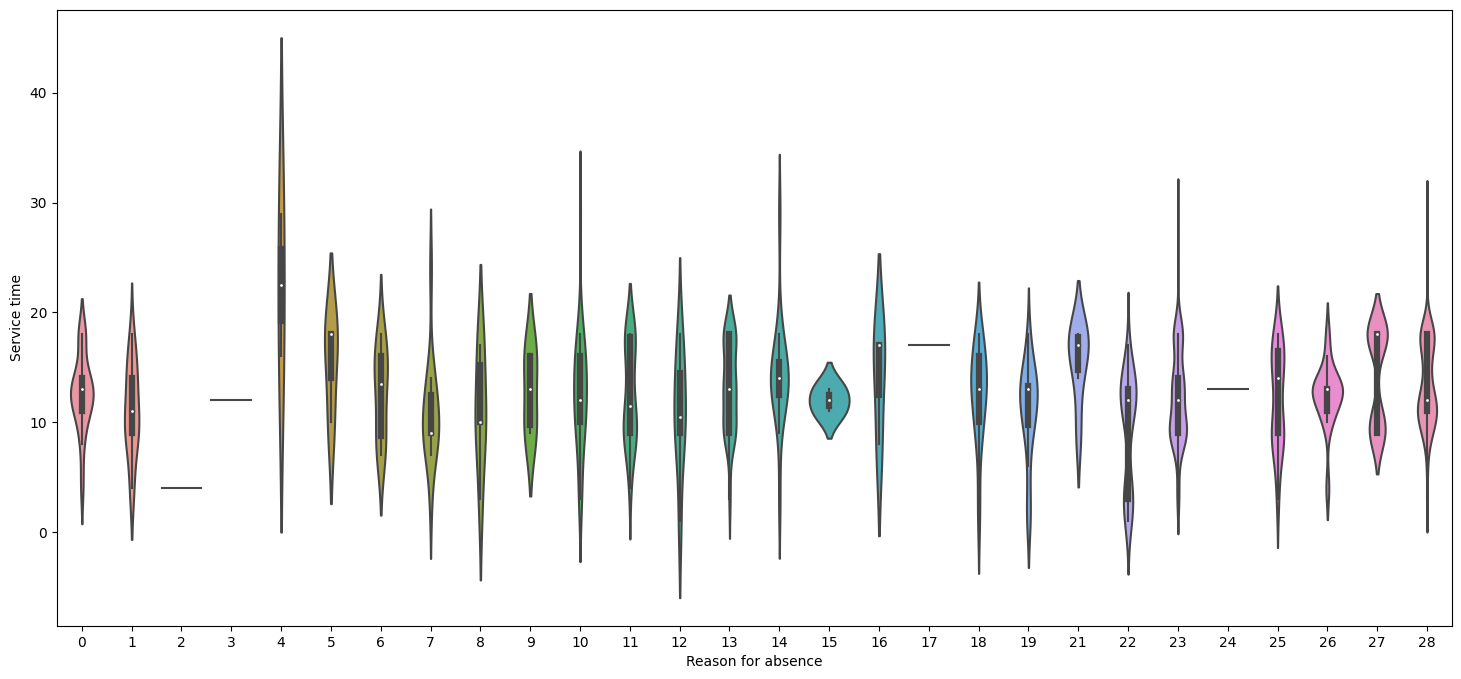

In [51]:
# violin plot of the Service time column and the Reason for absence column
plt.figure(figsize=(18, 8))
sns.violinplot(data=preprocessed_data, x='Reason for absence', y='Service time')

We can see that people who absence due to pregnancy (15) have narrow range of service time. However there're only 2 entries, no conclusion can be made.

In [53]:
preprocessed_data[preprocessed_data['Reason for absence'] == 15]['Service time'].describe()

count     2.000000
mean     12.000000
std       1.414214
min      11.000000
25%      11.500000
50%      12.000000
75%      12.500000
max      13.000000
Name: Service time, dtype: float64

Because Absenteeism time in hour are highly skewed, we need to normalize it before plotting correlation with Service time

<Figure size 1000x600 with 0 Axes>

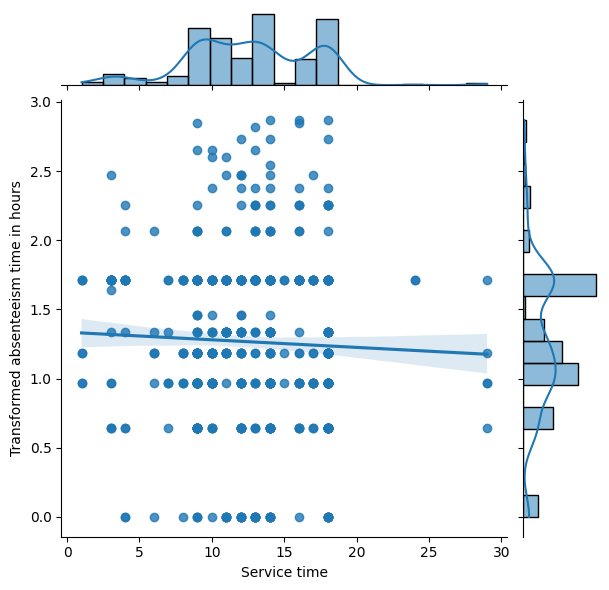

In [61]:
# correlation plot between the Service time and Absenteeism time in hours columns
from scipy.stats import yeojohnson

# get the data
service_time = preprocessed_data['Service time']
absenteeism_time = yeojohnson(preprocessed_data["Absenteeism time in hours"].apply(float))[0]

# plotting
plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=service_time, y=absenteeism_time, kind="reg")
ax.set_axis_labels("Service time", "Transformed absenteeism time in hours")

In [ ]:
# plot for the Service time, agains Reason for absence
# produce correlation plot between Service time and Absenteeism time in hours
from scipy.stats import yeojohnson
plt.figure(figsize=(10, 6))
service_time = data["Service time"]
absenteeism_time = yeojohnson(data["Absenteeism time in hours"].apply(float))[0]
ax = sns.jointplot(x=service_time, y=absenteeism_time, kind="reg")
ax.set_axis_labels("Service time", "Transformed absenteeism time in hours")

There's a slight negative correlation between the 2 features, let's do calculate the correlation coefficient

In [58]:
# investigate correlation between the columns
service_corr = pearsonr(absenteeism_time, service_time)
print(f"Service time correlation: corr={service_corr[0]:.3f}, pvalue={service_corr[1]:.3f}")

Service time correlation: corr=-0.042, pvalue=0.250


The pvalue > 0.05, we can not confirm that the slight negative correlation -0.042 is statistically significant.

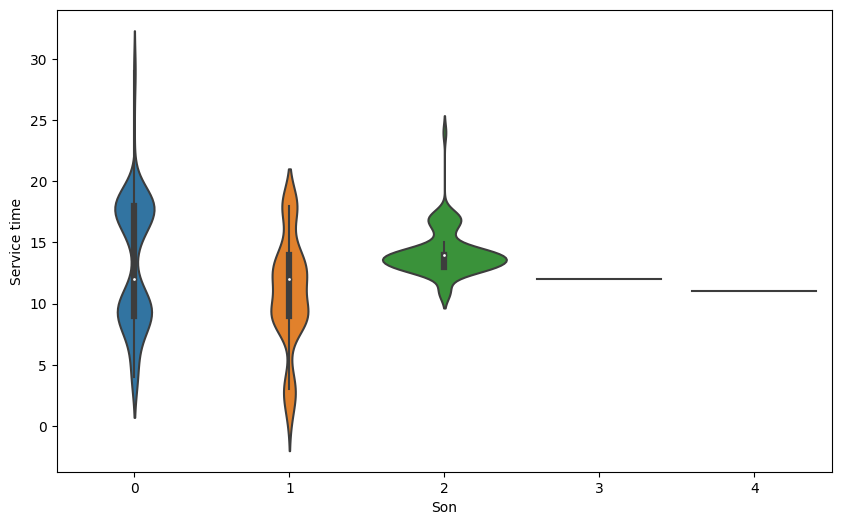

In [59]:
# analyze distribution of Absenteeism time in hours, per number of children
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x = "Son", y="Service time", data=data)